#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Tema 4: Desicion Tree Regressor Alumno: Ibarra Ramírez Sergio </font>

Recordar que existen dos maneras de controlar nuestro arbol: <br>
 A) Definniendo la profundidad del arbol <br>
 B) Definiendo elnúmero minomo de elementos que tiene cada hoja 

Vamos a separar las variables independientes de la dependiente y los sets de train y test

In [3]:
import pandas as pd

tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/Alumni_Giving_Regression.csv")

from sklearn.model_selection import train_test_split

# AQUI SEPARO DEPENDIENTE DE INDEPENDIENTES
y = tabla["E"] 
X = tabla.drop(["E"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

In [4]:
from sklearn.tree import DecisionTreeRegressor

Definimos y entrenamos el modelo tnato por Deep como por min_samples_leaf 

In [5]:
# Profundidad
arbolP = DecisionTreeRegressor(max_depth=3)
# Hojas
arbolH = DecisionTreeRegressor(min_samples_leaf=5)

arbolP.fit(X_train,y_train)
arbolH.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=5)

Se hace la predicicón con el modelo DecisionTreeRegressor yc se evalua el error 

In [6]:
from sklearn.metrics import mean_squared_error

y_predP = arbolP.predict(X_test)
RMSE = mean_squared_error(y_test,y_predP,squared=False)
print(RMSE)

y_predH = arbolH.predict(X_test)
RMSE = mean_squared_error(y_test,y_predH,squared=False)
print(RMSE)

0.03576310424180861
0.03562197442209507


Vamos a visalizar el arbol definido # Profundidad arbolP = DecisionTreeRegressor(max_depth=3)

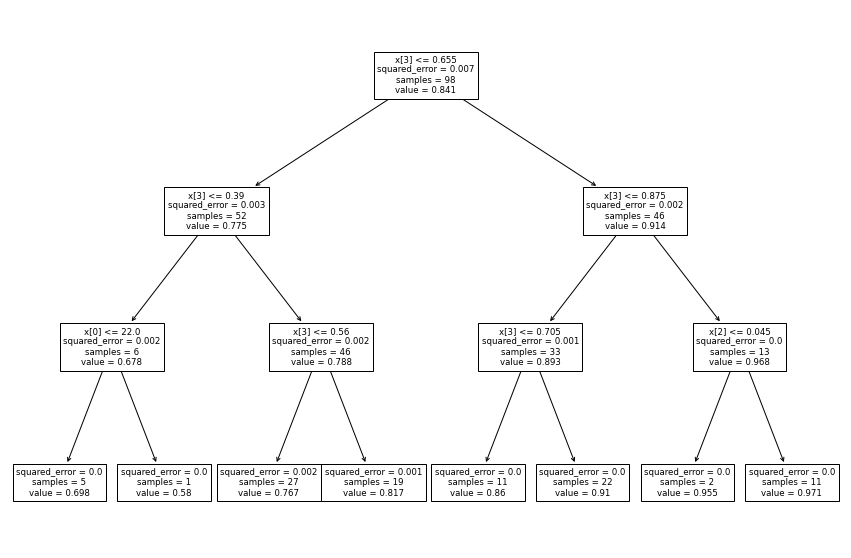

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(arbolP)
plt.show()

Vamos a visalizar el arbol definido # Profundidad arbolH = DecisionTreeRegressor(min_samples_leaf=5)


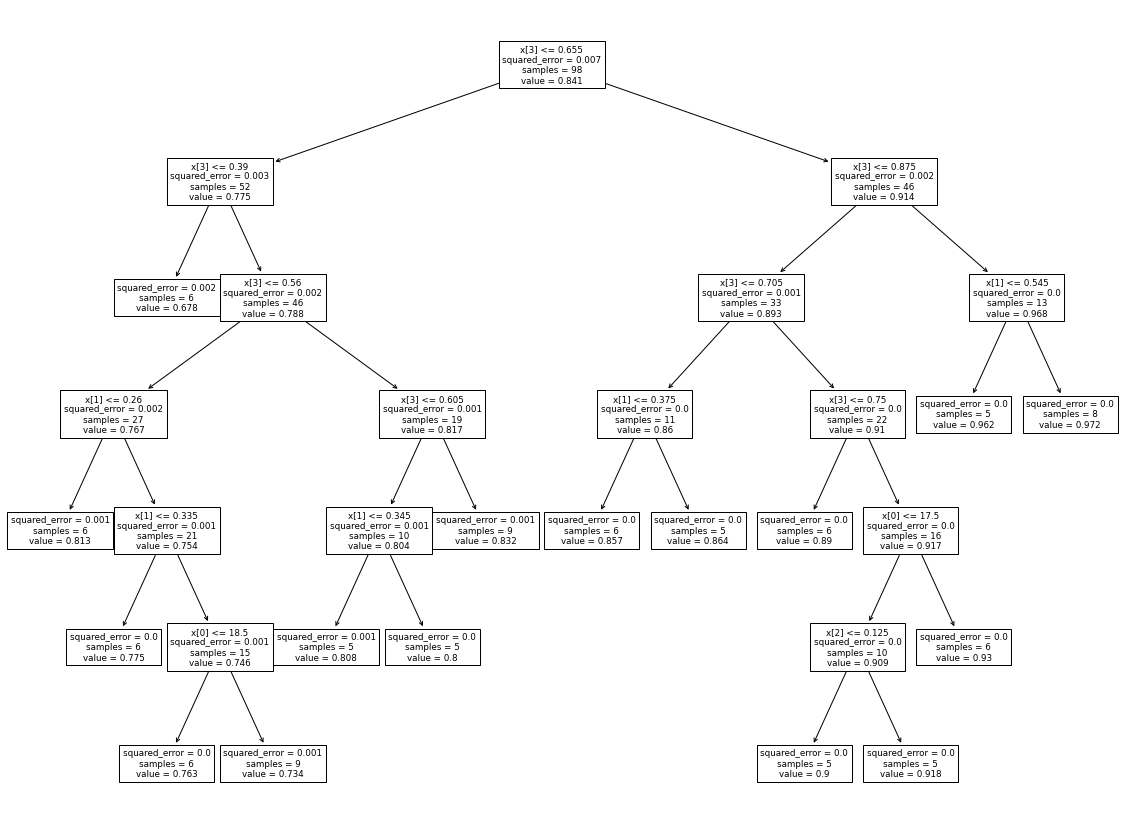

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(arbolH)
plt.show()

Para determinar la importancia de cada feature o característica Xj 

In [10]:
arbolH.feature_importances_

array([0.00698336, 0.0307643 , 0.00121432, 0.96103803, 0.        ])

Vamos a hacer un loop para diferentes valores de max_depth

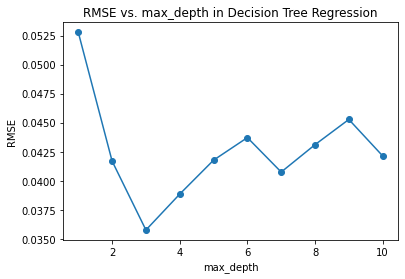

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the range of max_depth values
max_depth_values = np.arange(1, 11)

# Initialize an empty list to store the RMSE values
rmse_values = []

# Loop through each max_depth value
for max_depth in max_depth_values:
    # Define the Decision Tree regression model
    arbolP = DecisionTreeRegressor(max_depth=max_depth)
    
    # Fit the model to the training data
    arbolP.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_predP = arbolP.predict(X_test)
    
    # Calculate the RMSE
    rmse = mean_squared_error(y_test, y_predP, squared=False)
    
    # Append the RMSE value to the list
    rmse_values.append(rmse)

# Plot the RMSE values against the max_depth values
plt.plot(max_depth_values, rmse_values, marker='o')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE vs. max_depth in Decision Tree Regression')
plt.show()


Vamos a hacer un loop para diferentes valores de min_samples_leaf_values

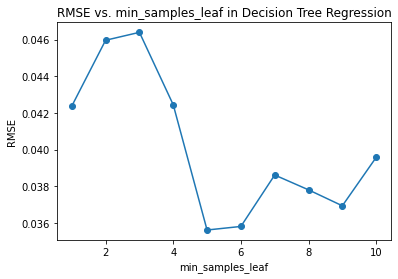

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the range of max_depth values
min_samples_leaf_values = np.arange(1, 11)

# Initialize an empty list to store the RMSE values
rmse_values = []

# Loop through each max_depth value
for min_samples_leaf in min_samples_leaf_values:
    # Define the Decision Tree regression model
    # Hojas
    arbolH = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    
    # Fit the model to the training data
    arbolH.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_predH = arbolH.predict(X_test)
    
    # Calculate the RMSE
    rmse = mean_squared_error(y_test, y_predH, squared=False)
    
    # Append the RMSE value to the list
    rmse_values.append(rmse)

# Plot the RMSE values against the max_depth values
plt.plot(min_samples_leaf_values, rmse_values, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.title('RMSE vs. min_samples_leaf in Decision Tree Regression')
plt.show()


Ejemplo de calculo de criterio de AIC para el loop de diferentes valores de min_samples_leaf_values en el caso del from sklearn.tree import DecisionTreeRegressor

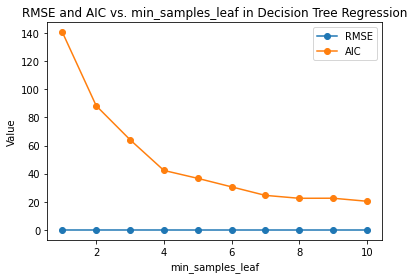

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the range of min_samples_leaf values
min_samples_leaf_values = np.arange(1, 11)

# Initialize empty lists to store the RMSE values and AIC values
rmse_values = []
aic_values = []

# Loop through each min_samples_leaf value
for min_samples_leaf in min_samples_leaf_values:
    # Define the Decision Tree regression model
    arbolH = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    
    # Fit the model to the training data
    arbolH.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_predH = arbolH.predict(X_test)
    
    # Calculate the RMSE
    rmse = mean_squared_error(y_test, y_predH, squared=False)
    
    # Append the RMSE value to the list
    rmse_values.append(rmse)
    
    # Calculate the number of model parameters
    num_params = arbolH.get_n_leaves() - 1
    
    # Calculate the AIC value
    aic = 2 * num_params - 2 * np.log(rmse)
    
    # Append the AIC value to the list
    aic_values.append(aic)

# Plot the RMSE values against the min_samples_leaf values
plt.plot(min_samples_leaf_values, rmse_values, marker='o', label='RMSE')
plt.plot(min_samples_leaf_values, aic_values, marker='o', label='AIC')
plt.xlabel('min_samples_leaf')
plt.ylabel('Value')
plt.title('RMSE and AIC vs. min_samples_leaf in Decision Tree Regression')
plt.legend()
plt.show()
